# 1. 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. 데이터 불러오기

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/submission_1002.csv")

print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (16909, 1301)
test shape :  (8760, 201)


In [3]:
display(train['Time'].head())
display(test['Time'].head())
display(train['Time'].tail())
display(test['Time'].tail())

0    2016-07-26 11:00
1    2016-07-26 12:00
2    2016-07-26 13:00
3    2016-07-26 14:00
4    2016-07-26 15:00
Name: Time, dtype: object

0    2017.7.1 0:00
1    2017.7.1 1:00
2    2017.7.1 2:00
3    2017.7.1 3:00
4    2017.7.1 4:00
Name: Time, dtype: object

16904    2018-06-30 19:00
16905    2018-06-30 20:00
16906    2018-06-30 21:00
16907    2018-06-30 22:00
16908    2018-06-30 23:00
Name: Time, dtype: object

8755    2018.6.30 19:00
8756    2018.6.30 20:00
8757    2018.6.30 21:00
8758    2018.6.30 22:00
8759    2018.6.30 23:00
Name: Time, dtype: object

In [4]:
train = train.set_index('Time')
test = test.set_index('Time')

#### train과 test의 중복 컬럼값이 있는지 확인

In [5]:
train_columns = set(train.columns)
test_columns = set(test.columns)

result = [x for x in test_columns if x in train_columns]

result

[]

# 3. 결측치 분석

In [7]:
# !pip install missingno
import missingno as msno

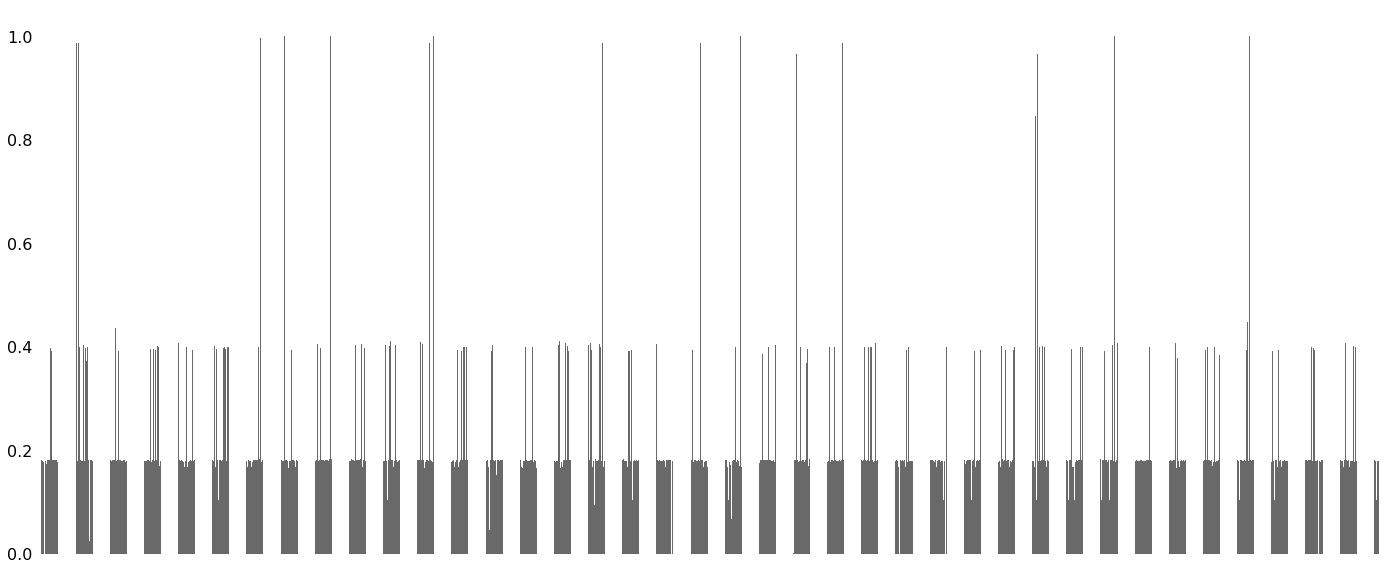

In [8]:
msno.bar(train)

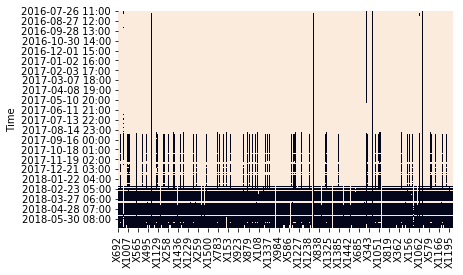

In [9]:
sns.heatmap(train.isnull(), cbar=False)

In [15]:
def count_msg(data):
    msg = []
    for i in data.columns:
        msg.append(data[i].isnull().sum())
    
    return msg

In [16]:
train_msg = count_msg(train)

print("max null : " ,np.max(train_msg))
print("min null : " ,np.min(train_msg))
print("mean null : " ,'%.2f'% (np.mean(train_msg)))
print("median null : " ,np.median(train_msg))

max null :  16909
min null :  0
mean null :  13054.98
median null :  13846.5


In [17]:
test_msg = count_msg(test)

print("max null : " ,np.max(test_msg))
print("min null : " ,np.min(test_msg))
print("mean null : " ,'%.2f'% (np.mean(test_msg)))
print("median null : " ,np.median(test_msg))

max null :  7005
min null :  0
mean null :  2356.49
median null :  2007.0


## 결측치 채우는 함수

In [18]:
def change_mean(data_frame):
    data_frame = data_frame.fillna(data_frame.mean(), inplace =True)
    return data_frame

In [19]:
change_mean(train)
display(train.head())

,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,X1047,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762
2016-07-26 12:00,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762
2016-07-26 13:00,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762
2016-07-26 14:00,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762
2016-07-26 15:00,0.371506,0.410571,0.519877,0.260363,NaN,0.268325,0.378017,0.424614,0.302138,0.273101,...,0.410577,0.441267,0.271726,0.141011,0.384662,0.552852,0.487484,2.881876,0.356959,0.339762


In [20]:
change_mean(test)
display(test.head())

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
Time,,,,,,,,,,,,,,,,,,,,,
2017.7.1 0:00,1.472014,0.503509,0.339697,0.333051,0.35778,0.226552,0.424325,0.347813,0.09684,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,0.275,0.021,0.374754
2017.7.1 1:00,1.472014,0.503509,0.339697,0.333051,0.35778,0.226552,0.424325,0.347813,0.09684,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,0.222,0.021,0.374754
2017.7.1 2:00,1.472014,0.503509,0.339697,0.333051,0.35778,0.226552,0.424325,0.347813,0.09684,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,0.237,0.021,0.374754
2017.7.1 3:00,1.472014,0.503509,0.339697,0.333051,0.35778,0.226552,0.424325,0.347813,0.09684,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,0.229,0.020,0.374754
2017.7.1 4:00,1.472014,0.503509,0.339697,0.333051,0.35778,0.226552,0.424325,0.347813,0.09684,0.253864,...,0.230307,0.214052,0.341709,0.323324,0.219365,0.262912,0.237281,0.202,0.021,0.374754


In [23]:
train = train.dropna(axis=1)
print(train.shape)

(16909, 1292)


## X와 Y로 데이터 자르는 함수

In [25]:
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
            
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
pca.fit(train)
train_pca = pca.transform(train)

print("원본 데이터 형태 : ", train.shape)
print("축소된 데이터 형태 : ", train_pca.shape)

원본 데이터 형태 :  (16909, 1292)
축소된 데이터 형태 :  (16909, 200)


In [28]:
PX_train, Py_train= split_sequence(train_pca, 24)

print(" PX_train shape: ",PX_train.shape,"\n","Py_train shape: ",Py_train.shape)

 PX_train shape:  (16885, 24, 200) 
 Py_train shape:  (16885, 200)


# 모델

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, input_shape = (24, 200)))
model.add(Dense(5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(200))

model.compile(loss = 'mse',
             optimizer='sgd', metrics = ["MSE"])

In [ ]:
history = model.fit(PX_train, Py_train, epochs = 8, batch_size = 126)

In [ ]:
PX_train[0].shape

In [ ]:
model.predict(PX_train)